In [1]:
import pandas as pd
import numpy as np

def load_data(file_path, sheet_name='Sheet1'):
    return pd.read_excel(file_path, sheet_name=sheet_name)

def calculate_centroid(df, column_name):
    return np.mean(df[column_name])

def calculate_spread(df, column_name):
    return np.std(df[column_name])

def calculate_euclidean_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

def main():
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    data = load_data(file_path)

    df = data[['rank', 'signal']]

    rank_centroid = calculate_centroid(df, 'rank')
    signal_centroid = calculate_centroid(df, 'signal')

    rank_spread = calculate_spread(df, 'rank')
    signal_spread = calculate_spread(df, 'signal')

    distance = calculate_euclidean_distance(rank_centroid, signal_centroid)

    print(f"Rank Centroid: {rank_centroid}")
    print(f"Signal Centroid: {signal_centroid}")
    print(f"Rank Spread (Standard Deviation): {rank_spread}")
    print(f"Signal Spread (Standard Deviation): {signal_spread}")
    print(f"Distance between Centroids: {distance}")

main()


Rank Centroid: 0.035057674006542014
Signal Centroid: 0.04142095909447434
Rank Spread (Standard Deviation): 0.15236817806823227
Signal Spread (Standard Deviation): 0.14801733380630194
Distance between Centroids: 0.006363285087932324


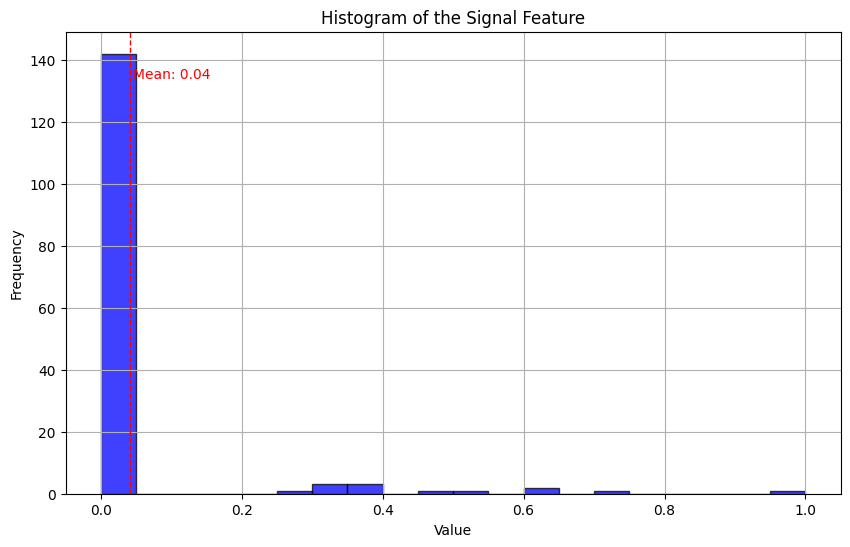

Mean of the 'signal' feature: 0.04
Variance of the 'signal' feature: 0.02


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    """Load the Excel file."""
    return pd.read_excel(file_path)

def select_feature(data, column_name):
    """Select a specific feature (column) from the dataset."""
    return data[column_name]

def calculate_statistics(data):
    """Calculate the mean and variance of the data."""
    mean = np.mean(data)
    variance = np.var(data)
    return mean, variance

def plot_histogram(data, mean, title, xlabel, ylabel, bins=20):
    """Generate and display a histogram of the data."""
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, alpha=0.75, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Add mean line and text
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    plt.text(mean * 1.1, plt.ylim()[1] * 0.9, f'Mean: {mean:.2f}', color='red')
    
    plt.show()

def main():
    # Load the Excel file
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    data = load_data(file_path)

    # Select the 'signal' feature
    signal_data = select_feature(data, 'signal')

    # Calculate statistics
    signal_mean, signal_variance = calculate_statistics(signal_data)

    # Plot the histogram
    plot_histogram(signal_data, signal_mean, 'Histogram of the Signal Feature', 'Value', 'Frequency')

    # Print the calculated mean and variance
    print(f"Mean of the 'signal' feature: {signal_mean:.2f}")
    print(f"Variance of the 'signal' feature: {signal_variance:.2f}")

main()


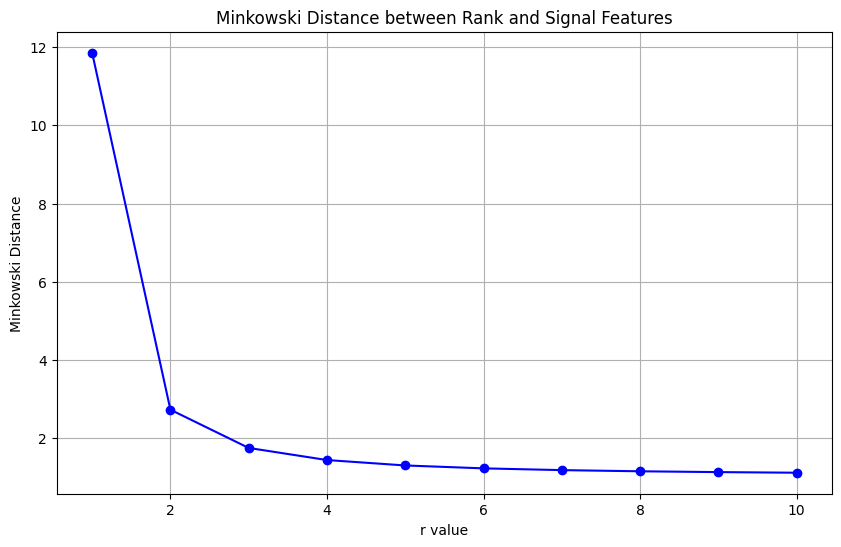

Minkowski Distance with r=1: 11.85
Minkowski Distance with r=2: 2.73
Minkowski Distance with r=3: 1.75
Minkowski Distance with r=4: 1.44
Minkowski Distance with r=5: 1.30
Minkowski Distance with r=6: 1.23
Minkowski Distance with r=7: 1.19
Minkowski Distance with r=8: 1.16
Minkowski Distance with r=9: 1.13
Minkowski Distance with r=10: 1.12


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

def load_data(file_path, sheet_name='Sheet1'):
    """Load the Excel dataset."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def extract_features(data, feature_1, feature_2):
    """Extract two feature vectors from the dataset and ensure they are the same length."""
    feature_1_data = data[feature_1]
    feature_2_data = data[feature_2]
    
    # Ensure both feature vectors are of the same length
    if len(feature_1_data) != len(feature_2_data):
        min_length = min(len(feature_1_data), len(feature_2_data))
        feature_1_data = feature_1_data[:min_length]
        feature_2_data = feature_2_data[:min_length]
    
    return feature_1_data, feature_2_data

def calculate_minkowski_distances(feature_1_data, feature_2_data, r_values):
    """Calculate Minkowski distances for a range of r values."""
    distances = []
    for r in r_values:
        distance = minkowski(feature_1_data, feature_2_data, r)
        distances.append(distance)
    return distances

def plot_minkowski_distances(r_values, distances):
    """Plot Minkowski distances against r values."""
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, distances, marker='o', linestyle='-', color='blue')
    plt.title('Minkowski Distance between Rank and Signal Features')
    plt.xlabel('r value')
    plt.ylabel('Minkowski Distance')
    plt.grid(True)
    plt.show()

def main():
    # Load the dataset
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    data = load_data(file_path)
    
    # Extract the 'rank' and 'signal' feature vectors
    rank_data, signal_data = extract_features(data, 'rank', 'signal')
    
    # Calculate Minkowski distances for r from 1 to 10
    r_values = range(1, 11)
    minkowski_distances = calculate_minkowski_distances(rank_data, signal_data, r_values)
    
    # Plot the Minkowski distances
    plot_minkowski_distances(r_values, minkowski_distances)
    
    # Print the calculated Minkowski distances
    for r, distance in zip(r_values, minkowski_distances):
        print(f"Minkowski Distance with r={r}: {distance:.2f}")

if __name__ == "__main__":
    main()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels from the dataset."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels based on the median of the 'rank' column
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def print_dataset_shapes(X_train, X_test, y_train, y_test):
    """Print the shapes of the resulting datasets."""
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

def display_sample(X_train, y_train, y_test):
    """Display samples from the train and test sets."""
    print("\nX_train sample:")
    print(X_train.head())
    print("\ny_train sample:")
    print(y_train.head())
    print('\ny_test sample:')
    print(y_test.head())

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load data
    data = load_data(file_path)
    
    # Preprocess data
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Print dataset shapes
    print_dataset_shapes(X_train, X_test, y_train, y_test)
    
    # Display sample data
    display_sample(X_train, y_train, y_test)

if __name__ == "__main__":
    main()


X_train shape: (108, 2)
X_test shape: (47, 2)
y_train shape: (108,)
y_test shape: (47,)

X_train sample:
       signal      rank
141  0.000000  0.000000
66   0.000000  0.000000
119  0.000000  0.549714
27   0.349389  0.000000
79   0.000000  0.000000

y_train sample:
141    0
66     0
119    1
27     0
79     0
Name: rank, dtype: int64

y_test sample:
81     0
142    0
31     0
29     0
118    0
Name: rank, dtype: int64


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def load_data(file_path):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path)

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels from the dataset."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels based on the median of the 'rank' column
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_knn_classifier(X_train, y_train, n_neighbors=3):
    """Instantiate and train a kNN classifier."""
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    return clf

def evaluate_classifier(clf, X_test, y_test):
    """Make predictions and evaluate the classifier."""
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Accuracy on test set:", accuracy)
    print("\nClassification report:\n", report)

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Train the classifier
    clf = train_knn_classifier(X_train, y_train)
    
    # Evaluate the classifier
    evaluate_classifier(clf, X_test, y_test)

if __name__ == "__main__":
    main()


Accuracy on test set: 0.9787234042553191

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.50      0.67         2

    accuracy                           0.98        47
   macro avg       0.99      0.75      0.83        47
weighted avg       0.98      0.98      0.98        47



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels from the dataset."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels based on the median of the 'rank' column
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_knn_classifier(X_train, y_train, n_neighbors=3):
    """Instantiate and train a kNN classifier."""
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    return clf

def evaluate_classifier(clf, X_test, y_test):
    """Make predictions and evaluate the classifier."""
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Accuracy on test set:", accuracy)
    print("\nClassification report:\n", report)
    
    # Test accuracy using the score method
    test_accuracy = clf.score(X_test, y_test)
    print(f"\nTest set accuracy using score method: {test_accuracy:.2f}")

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Train the classifier
    clf = train_knn_classifier(X_train, y_train)
    
    # Evaluate the classifier
    evaluate_classifier(clf, X_test, y_test)

if __name__ == "__main__":
    main()


Accuracy on test set: 0.9787234042553191

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.50      0.67         2

    accuracy                           0.98        47
   macro avg       0.99      0.75      0.83        47
weighted avg       0.98      0.98      0.98        47


Test set accuracy using score method: 0.98


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels from the dataset."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels based on the median of the 'rank' column
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_knn_classifier(X_train, y_train, n_neighbors=3):
    """Instantiate and train a kNN classifier."""
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    return clf

def evaluate_classifier(clf, X_test, y_test):
    """Make predictions and evaluate the classifier."""
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Accuracy on test set:", accuracy)
    print("\nClassification report:\n", report)
    
    # Test accuracy using the score method
    test_accuracy = clf.score(X_test, y_test)
    print(f"\nTest set accuracy using score method: {test_accuracy:.2f}")

def predict_test_set(clf, X_test):
    """Predict labels for the entire test set."""
    test_predictions = clf.predict(X_test)
    print("\nPredictions for the test set:")
    print(test_predictions)

def predict_single_vector(clf, test_vector):
    """Perform classification for a given vector."""
    predicted_class = clf.predict(test_vector)
    print(f"\nPredicted class for the given test vector: {predicted_class[0]}")

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Train the classifier
    clf = train_knn_classifier(X_train, y_train)
    
    # Evaluate the classifier
    evaluate_classifier(clf, X_test, y_test)
    
    # Predict labels for the test set
    predict_test_set(clf, X_test)
    
    # Predict for a single test vector
    test_vect = X_test.iloc[0:1]  # Keep it as a DataFrame
    predict_single_vector(clf, test_vect)

if __name__ == "__main__":
    main()


Accuracy on test set: 0.9787234042553191

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.50      0.67         2

    accuracy                           0.98        47
   macro avg       0.99      0.75      0.83        47
weighted avg       0.98      0.98      0.98        47


Test set accuracy using score method: 0.98

Predictions for the test set:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]

Predicted class for the given test vector: 0


Accuracy with k=1: 1.00
Accuracy with k=2: 0.98
Accuracy with k=3: 0.98
Accuracy with k=4: 0.98
Accuracy with k=5: 0.98
Accuracy with k=6: 0.98
Accuracy with k=7: 0.98
Accuracy with k=8: 0.98
Accuracy with k=9: 0.98
Accuracy with k=10: 0.98
Accuracy with k=11: 0.98


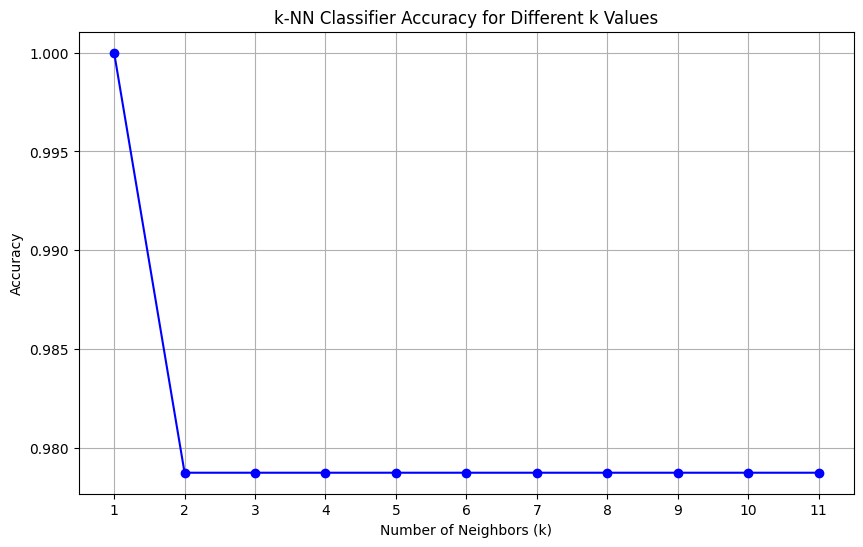

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels from the dataset."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels based on the median of the 'rank' column
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def evaluate_knn(X_train, X_test, y_train, y_test, k_range):
    """Train and evaluate kNN classifiers for different k values."""
    accuracies = []
    
    for k in k_range:
        # Instantiate the kNN classifier with current k
        clf = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the classifier on the training data
        clf.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = clf.predict(X_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy with k={k}: {accuracy:.2f}")
    
    return accuracies

def plot_accuracies(k_range, accuracies):
    """Plot accuracy vs. number of neighbors (k)."""
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, marker='o', linestyle='-', color='b')
    plt.title('k-NN Classifier Accuracy for Different k Values')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Define range of k values
    k_range = range(1, 12)
    
    # Evaluate kNN classifiers
    accuracies = evaluate_knn(X_train, X_test, y_train, y_test, k_range)
    
    # Plot accuracies
    plot_accuracies(k_range, accuracies)

if __name__ == "__main__":
    main()


Confusion Matrix for Training Set:
[[101   0]
 [  0   7]]

Confusion Matrix for Test Set:
[[45  0]
 [ 1  1]]

Training Set - Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Test Set - Precision: 1.00, Recall: 0.50, F1-Score: 0.67


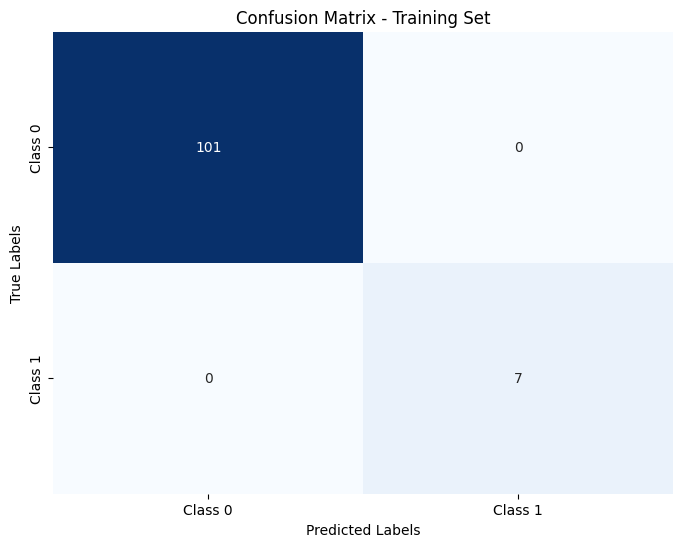

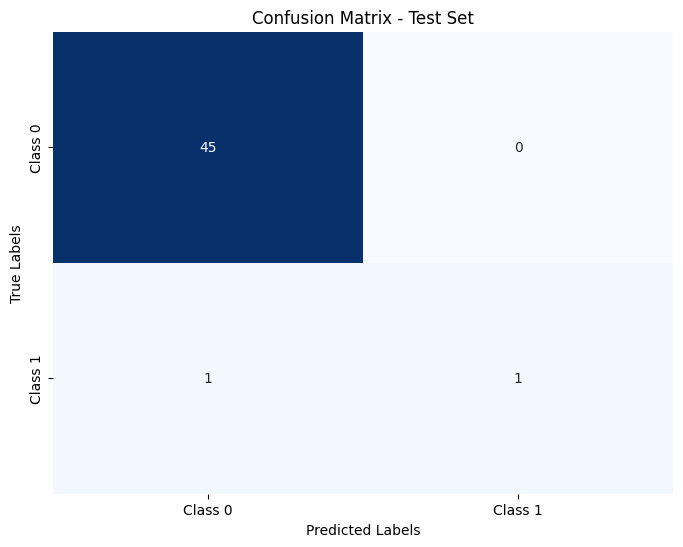

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels from the dataset."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels based on the median of the 'rank' column
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_knn_classifier(X_train, y_train, n_neighbors=3):
    """Instantiate and train a kNN classifier."""
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    return clf

def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    """Evaluate the classifier with confusion matrix and metrics."""
    # Make predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Compute confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    # Compute precision, recall, and F1-Score
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    return (conf_matrix_train, precision_train, recall_train, f1_train, 
            conf_matrix_test, precision_test, recall_test, f1_test)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    """Plot confusion matrix using seaborn heatmap."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Train the classifier
    clf = train_knn_classifier(X_train, y_train)
    
    # Evaluate the classifier
    (conf_matrix_train, precision_train, recall_train, f1_train,
     conf_matrix_test, precision_test, recall_test, f1_test) = evaluate_classifier(clf, X_train, y_train, X_test, y_test)
    
    # Print metrics
    print("Confusion Matrix for Training Set:")
    print(conf_matrix_train)
    print("\nConfusion Matrix for Test Set:")
    print(conf_matrix_test)

    print(f"\nTraining Set - Precision: {precision_train:.2f}, Recall: {recall_train:.2f}, F1-Score: {f1_train:.2f}")
    print(f"Test Set - Precision: {precision_test:.2f}, Recall: {recall_test:.2f}, F1-Score: {f1_test:.2f}")
    
    # Plot confusion matrices
    plot_confusion_matrix(conf_matrix_train, title='Confusion Matrix - Training Set')
    plot_confusion_matrix(conf_matrix_test, title='Confusion Matrix - Test Set')

if __name__ == "__main__":
    main()
